In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
transactions = pd.read_csv('creditcard.csv')

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
transactions.isnull().any().any()


False

In [6]:
transactions.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227374,145050.0,1.890481,0.366342,-1.862576,1.872090,0.564703,-0.342776,0.000453,0.073705,0.824888,-1.017324,0.793102,0.573908,-0.889779,-2.891911,-2.045147,0.341578,2.120625,0.934998,0.204750,-0.220654,-0.461537,-0.962321,0.140740,-0.687697,0.042981,-0.811274,0.069227,0.006847,13.99,0
233784,147704.0,-0.042198,-5.495394,-3.200459,-1.555761,-0.273549,4.163129,-0.327845,0.643267,-1.199789,0.916486,-0.296436,-0.451464,0.499161,-0.218373,-0.057760,-0.508450,0.583405,-0.404454,-0.353249,2.043623,0.144454,-1.849764,-0.500262,0.685184,-0.987918,-0.677168,-0.169868,0.162221,1199.37,0
86508,61265.0,1.143862,-0.033856,0.225218,0.770752,-0.057021,0.237862,-0.187081,0.145705,0.120406,0.130669,0.188480,0.169438,-0.549566,0.519763,0.645557,0.954394,-1.179044,0.789162,0.349514,-0.019579,-0.192552,-0.753184,-0.083064,-0.893136,0.378556,-0.571785,0.016267,0.020640,59.99,0
239649,150203.0,-1.883354,2.355011,-2.233024,-1.127581,1.062035,0.303602,-0.693922,-3.990087,-0.762900,-0.980940,-0.059269,-0.250104,-1.659955,0.380319,-0.589394,0.958198,0.373410,1.032138,0.102376,-0.085263,0.384441,-0.167520,0.250920,-0.288773,-0.512109,0.445444,-0.527537,0.202128,27.00,0
147977,89219.0,1.845976,0.517518,-0.827000,3.725283,0.492869,-0.155695,0.358581,-0.039468,-1.269556,1.640368,0.517916,0.167061,-0.902182,0.734966,-1.572813,0.753114,-0.782489,-0.319218,-1.157511,-0.309676,-0.078924,-0.307176,0.231852,-0.055546,-0.126472,-0.194925,-0.059800,-0.058898,25.84,0


In [7]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [9]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']               # Response
del transactions   

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y


In [12]:
X_train.shape


(227845, 30)

In [13]:
X_test.shape


(56962, 30)

In [14]:
X_train.is_copy = False
X_test.is_copy = False

In [15]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [16]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600


In [17]:
X_train['Time'].max() / 24

1.9999074074074075

Text(0.5, 1.0, 'Transaction Times')

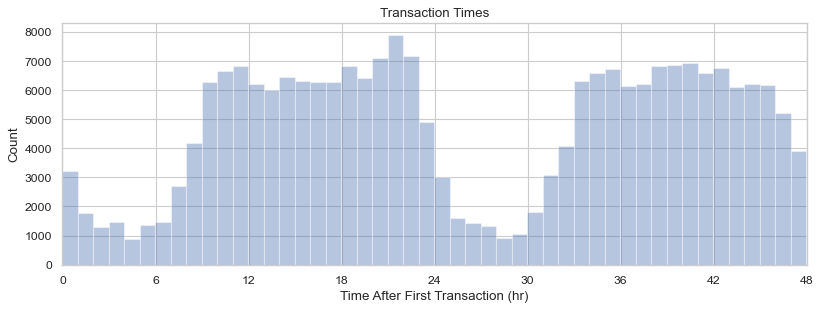

In [18]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [19]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

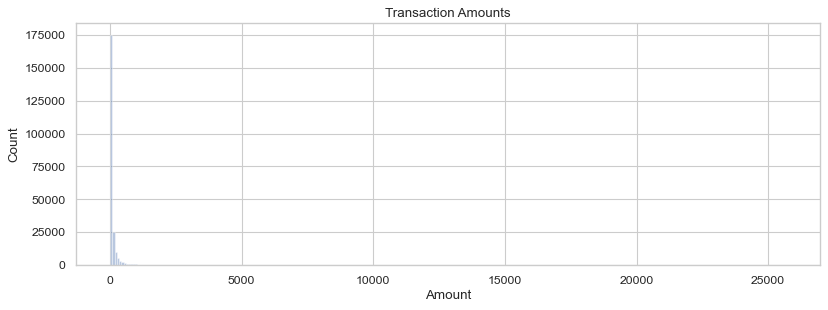

In [20]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

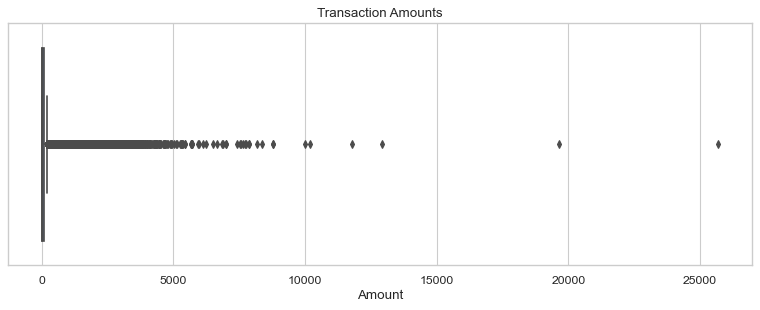

In [21]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [22]:
X_train['Amount'].skew()


16.910303546516744

In [23]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9


In [24]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)


In [25]:
maxlog

0.13436569587437017

In [26]:
(min_ci, max_ci)


(0.13291390124732358, 0.13582665450855202)

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

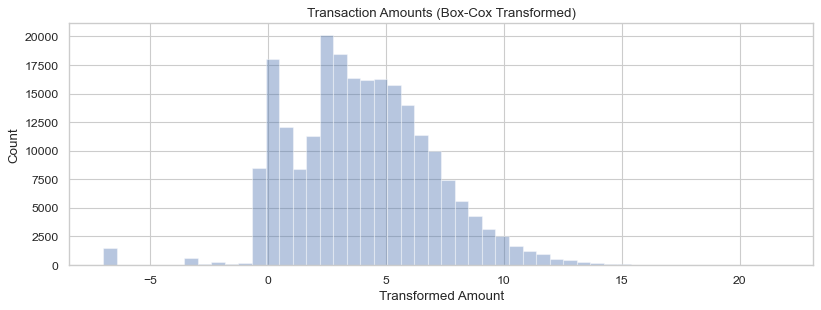

In [27]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [28]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [29]:
X_train['Amount'].skew()


0.11421485939418571

In [30]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9


In [31]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


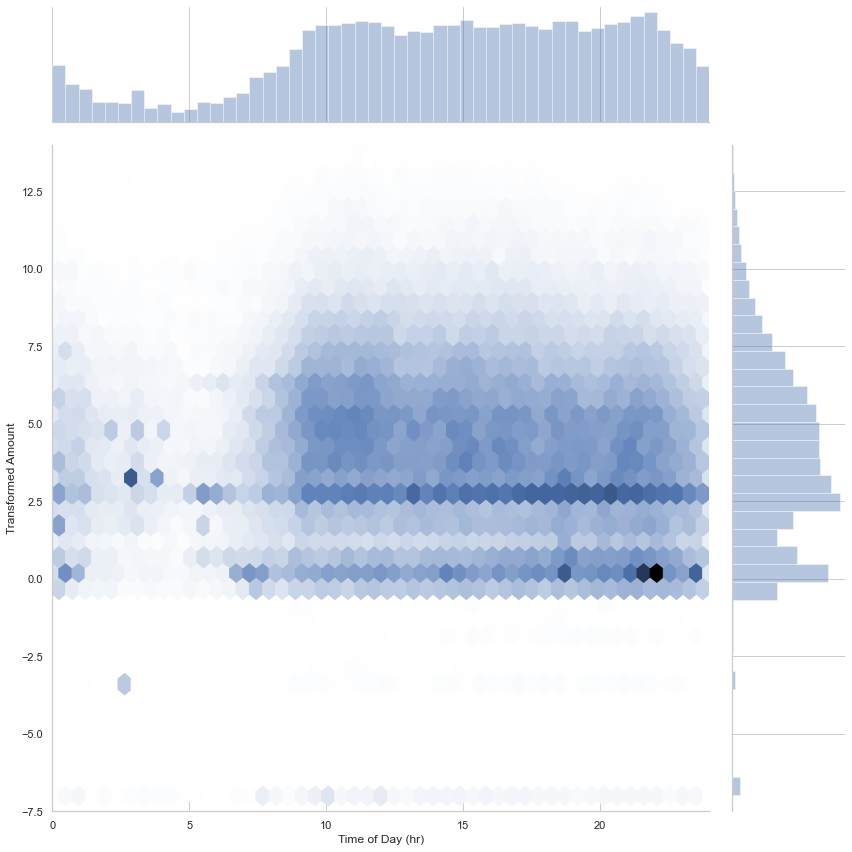

In [32]:
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')


In [33]:
pca_vars = ['V%i' % k for k in range(1,29)]


In [34]:
X_train[pca_vars].describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,0.000651,-0.000834,-0.000976,0.002291,-0.000595,-0.000499,0.000587,0.001448,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,1.020932,1.000266,0.996678,0.957485,0.916946,0.876978,0.846748,0.838169,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.431131,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,-0.761255,-0.406597,-0.650225,-0.423563,-0.584357,-0.469513,-0.484153,-0.497660,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,-0.032213,0.141227,-0.014920,0.051939,0.047181,0.066080,-0.065260,-0.001867,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,0.740921,0.617925,0.663521,0.495181,0.649788,0.522836,0.400067,0.501554,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

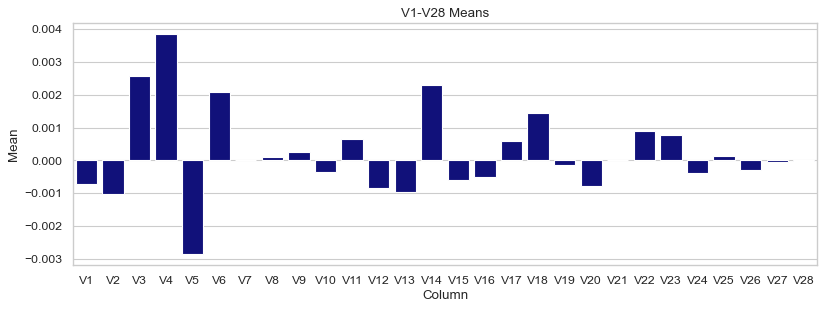

In [35]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

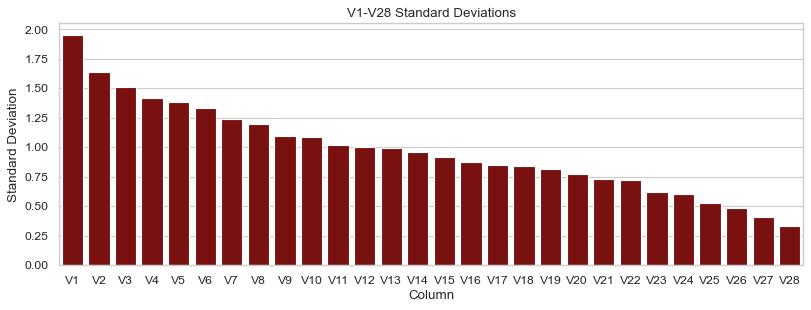

In [36]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

Text(0.5, 1.0, 'V1-V28 Skewnesses')

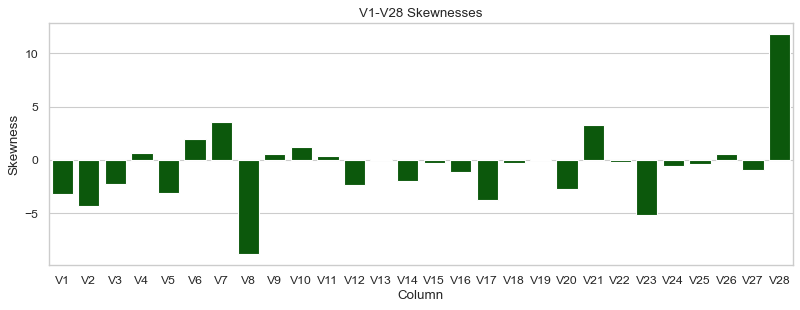

In [37]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

Text(0.5, 1.0, 'V8')

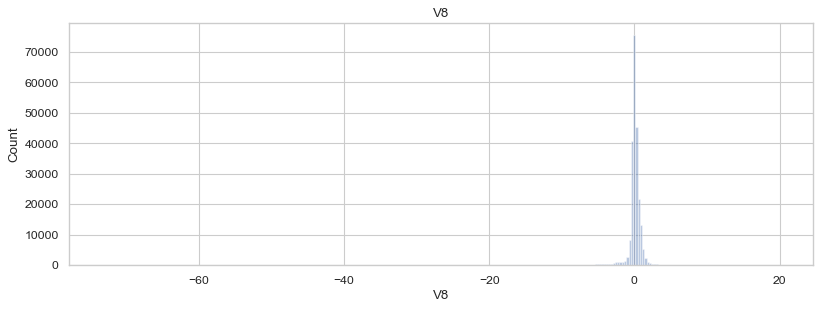

In [38]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')


Text(0.5, 1.0, 'V8')

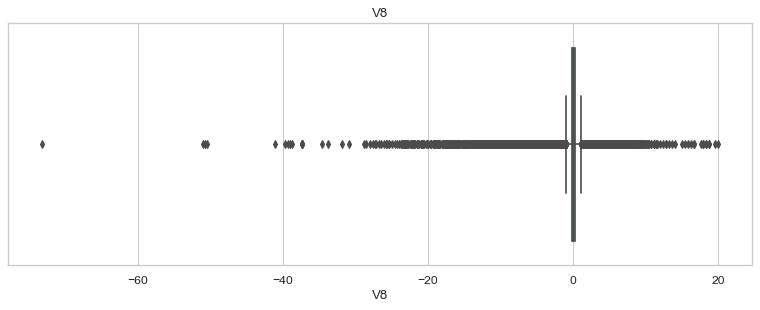

In [39]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

Text(0.5, 1.0, 'V1-V28 Kurtoses')

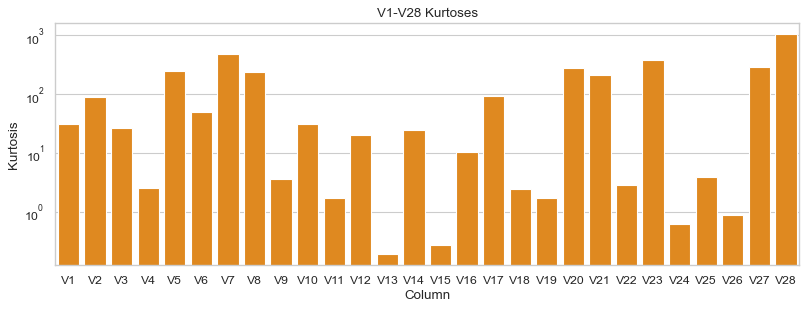

In [40]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5, 1.0, 'V1-V28 Medians')

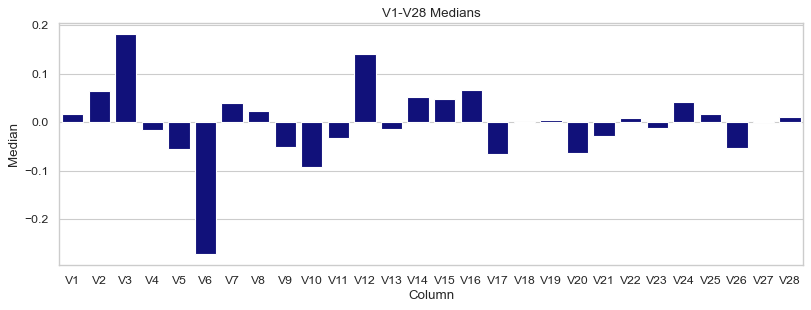

In [41]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5, 1.0, 'V1-V28 IQRs')

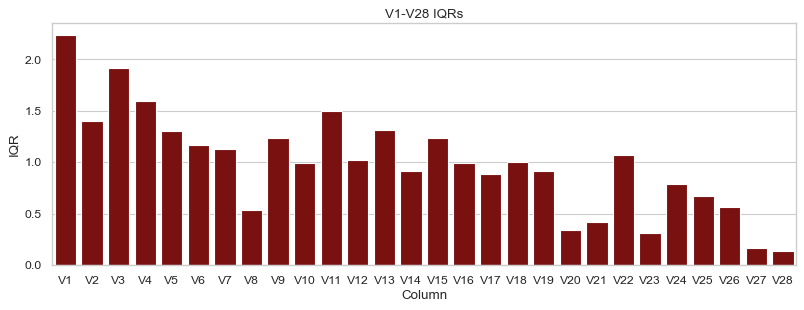

In [42]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [43]:
from sklearn.feature_selection import mutual_info_classif


In [45]:
#####----2------#


In [84]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


Using TensorFlow backend.


In [85]:
df = pd.read_csv("creditcard.csv")

In [86]:
df.shape


(284807, 31)

In [87]:
df.isnull().values.any()


False

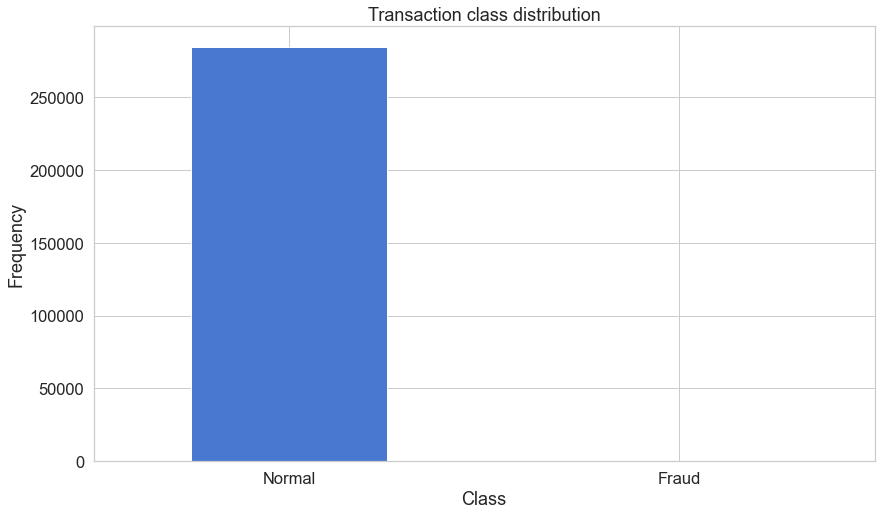

In [88]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");


In [89]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]


In [90]:
frauds.shape

(492, 31)

In [91]:
normal.shape


(284315, 31)

In [92]:
frauds.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [93]:
normal.Amount.describe()



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

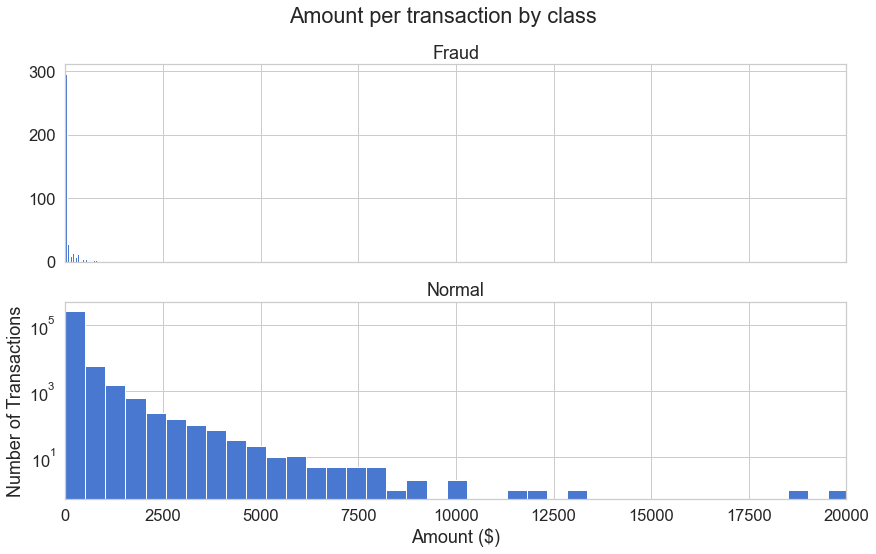

In [94]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();



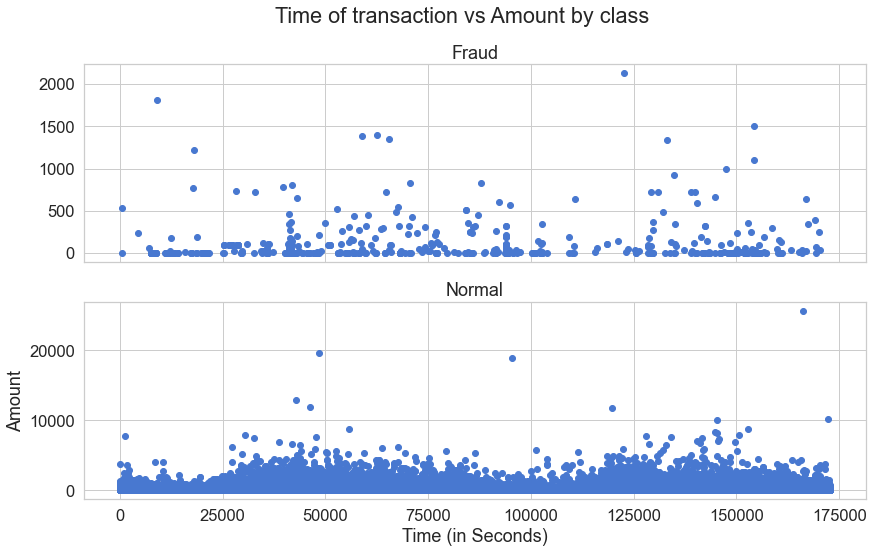

In [95]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))



In [97]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values


In [60]:
X_train['Time'].describe()


count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [98]:

X_train.shape


(227451, 29)